# **ML-Powered Clustering for TravelTide: Unsupervised Segmentation, Feature Engineering, and Strategic Perk Assignment**

---

## **Description:**

This **Jupyter Notebook (`ml_cluster_analyzer.ipynb`)** implements a **machine learning-driven customer clustering pipeline** for **TravelTide**, designed to uncover hidden patterns in user behavior and optimize perk assignment. The notebook leverages **unsupervised learning techniques** (K-Means, DBSCAN) and integrates the following modules to deliver **data-driven, actionable insights**:

---

### **Core Components:**

#### **1. Feature Engineering**
- **`feature_engineer.py`**: Transforms raw customer data into meaningful features (e.g., spending patterns, engagement metrics, travel frequency) for clustering.

#### **2. Clustering Algorithms**
- **`kmeans_engine.py`**: Implements **K-Means clustering** to group customers based on behavioral similarities.
- **`dbscan_engine.py`**: Uses **DBSCAN** to identify dense clusters and outliers, ideal for detecting niche segments.
- **`simple_ml_clustering.py`**: Provides a simplified interface for running and comparing clustering algorithms.

#### **3. Metrics & Evaluation**
- **`metrics_calculator.py`**: Computes clustering performance metrics (e.g., silhouette score, inertia) to validate segment quality.

#### **4. Perk Assignment**
- **`perk_assigner.py`**: Assigns personalized perks (e.g., discounts, free upgrades) to clusters based on their behavioral profiles.

#### **5. Visualization & Export**
- **`visualizer.py`**: Generates **2D/3D cluster visualizations** (e.g., PCA-reduced plots, elbow curves) for interpretability.
- **`data_exporter.py`**: Exports clustered data and metrics for downstream analysis or reporting.

#### **6. Orchestration**
- **`clustering_orchestrator.py`**: Coordinates the end-to-end clustering pipeline, from feature engineering to perk assignment.

---

### **Workflow:**
1. **Data Preparation**: Load and preprocess customer data.
2. **Feature Engineering**: Transform raw data into clustering-ready features.
3. **Clustering**: Apply K-Means or DBSCAN to segment customers.
4. **Evaluation**: Assess cluster quality using silhouette scores and inertia.
5. **Perk Assignment**: Map clusters to personalized perks.
6. **Visualization**: Plot clusters and metrics for stakeholder review.
7. **Export**: Save results for integration with marketing or CRM systems.

---

### **Target Audience:**
- **Data Scientists**: For algorithm tuning and validation.
- **Marketing Teams**: To design targeted campaigns for each cluster.
- **Product Managers**: To optimize perk strategies and user experience.
- **Business Analysts**: For ROI analysis and strategic decision-making.

---
### **Outputs:**
- **Clustered Data**: Customer segments with assigned perks.
- **Visualizations**: PCA plots, elbow curves, and cluster distributions.
- **Performance Metrics**: Silhouette scores, inertia, and segment sizes.


In [41]:
import os
import sys
# --- Setup ---
%load_ext autoreload
%autoreload 2
%matplotlib inline

bad_paths = [
    "/Users/guykaptue/my_work_spaces/machine learning",
    "/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/src"
]
sys.path = [p for p in sys.path if os.path.abspath(p) not in bad_paths]

print("Clean sys.path:")
for p in sys.path:
    print(" -", p)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Clean sys.path:
 - /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/notebooks
 - /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/notebooks
 - /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
 - /opt/anaconda3/envs/ml311/lib/python311.zip
 - /opt/anaconda3/envs/ml311/lib/python3.11
 - /opt/anaconda3/envs/ml311/lib/python3.11/lib-dynload
 - 
 - /opt/anaconda3/envs/ml311/lib/python3.11/site-packages
 - __editable__.tts_mastery_project-0.1.0.finder.__path_hook__


In [42]:
import pandas as pd  # noqa: F401
import numpy as np  # noqa: F401
from IPython.display import display

# ------------------------------------------------------------
# 1️⃣ Determine project root dynamically
# - Works even if notebook is in a subfolder of notebooks/
# ------------------------------------------------------------
cwd = os.getcwd()
print("Current working directory:", cwd)

# Project root = traveltide_project folder
# Assumes notebooks/ is directly under traveltide_project/
project_root = os.path.abspath(os.path.join(cwd, "..", "..", ".."))
print("Project root:", project_root)

## ------------------------------------------------------------
# 2️⃣ Add project root to sys.path for imports
# ------------------------------------------------------------
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Project root added to sys.path:", project_root)

print(sys.path)  # Ensure /traveltide_project is included

# Check if src exists
print(os.path.exists(os.path.join(project_root, "src")))

Current working directory: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/notebooks/segments/ml_model
Project root: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
Project root added to sys.path: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
['/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/notebooks', '/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/notebooks', '/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project', '/opt/anaconda3/envs/ml311/lib/python311.zip', '/opt/anaconda3/envs/ml311/lib/python3.11', '/opt/anaconda3/envs/ml311/lib/python3.11/lib-dynload', '', '/opt/anaconda3/envs/ml311/lib/python3.11/site-packages', '__editable__.tts_mastery_project-0.1.0.finder.__path_hook__']
True


In [43]:
# Verify that src is importable
try:
    import src
    print("✅ src module found at:", src.__file__)
except ModuleNotFoundError:
    print("❌ src module not found. Check your sys.path!")

✅ src module found at: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/src/__init__.py


## Load data

In [44]:
from src.core import (
    DataLoader, # noqa: F401
    KmeansClustering,                 
    ClusteringOrchestrator,  
) 

In [45]:
loader = DataLoader()

users = loader.load_table(data_type='feature', table_name='user_base')

✅ Verbindung zur PostgreSQL-Datenbank hergestellt.
📁 Lade Tabelle 'user_base' aus CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/features/user_base.csv
✅ CSV geladen. Zeilen: 5998


In [46]:
kmeans_cluster = KmeansClustering()

✅ Loaded YAML: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/config/ml_config.yaml
✅ Configuration loaded successfully
   - Threshold definitions: 7
   - Perks: 5
   - Group names: 5
✅ Loaded config from: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/config/ml_config.yaml
✅ BalancedClusteringPipeline initialized
   - Run name: kmeans
   - Data output: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/ml_model
   - Figure output: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/ml_model/kmeans



🚀 STARTING K-MEANS CLUSTERING PIPELINE: kmeans

Step 1/9: Calculating Thresholds...
[THRESHOLDS] Calculating dynamic thresholds...
   - TOTAL_SPEND: 5606.48 (quantile=0.8)
   - TRIP_COUNT: 4.00 (quantile=0.8)
   - BROWSING_RATE: 0.88 (quantile=0.8)
   - HOTEL_SPEND: 2733.88 (quantile=0.8)
   - BUSINESS_RATE: 0.40 (quantile=0.8)
   - GROUP_RATE: 0.10 (quantile=0.8)
   - AVG_BAGS: 1.00 (quantile=0.8)

Step 2/9: Feature Engineering...
[FEATURE ENGINEERING] Creating optimal derived metrics...
   ✅ Created 8 new derived features

Step 3/9: Feature Selection...
[FEATURE SELECTION] Selected 24/25 optimal features

Step 4/9: Winsorization...
[WINSORIZATION] Applied to 3 features

Step 5/9: Scaling and Dimensionality Reduction...
[SCALING] Using RobustScaler...
   ✅ Scaled 24 features
[PCA] Reducing to 0.95 components with whitening...
   ✅ Explained variance: 95.7%

Step 6/9: Balanced K-means Clustering & Hierarchical Assignment...
[BALANCED KMEANS] Fitting with k=5...
   📊 Initial distributi

INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
INFO:choreographer.browsers.chromium:Found chromium path: /Applications/Google Chrome.app/Contents/MacOS/Google Chrome
INFO:choreographer.utils._tmpfile:Temp directory created: /var/folders/ml/gbzd550j28bfftvz5yhp9gf40000gn/T/tmpu9d6xbhk.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: /var/folders/ml/gbzd550j28bfftvz5yhp9gf40000gn/T/tmpr7t4d1_y.
INFO:choreographer.browsers.chromium:Temporary directory at: /var/folders/ml/gbzd550j28bfftvz5yhp9gf40000gn/T/tmpr7t4d1_y



   ✅ K-Means Metrics:
   Clusters: 5
   Silhouette Score: 0.021
   Davies-Bouldin: 3.681
   Calinski-Harabasz: 287.5
   Cluster Balance: 0.816
   Business Alignment: 0.747
   ⚠️ Quality: NEEDS IMPROVEMENT
      Failed checks: silhouette_ok, davies_bouldin_ok

Step 9/9: Generating Visualizations and Exporting Results...
[VISUALIZATION] Creating K-Means plots...
   [TABLE] Generating kmeans segment summary...


INFO:kaleido.kaleido:Conforming 1 to file:///var/folders/ml/gbzd550j28bfftvz5yhp9gf40000gn/T/tmpu9d6xbhk/index.html
INFO:kaleido.kaleido:Waiting on all navigates
INFO:kaleido.kaleido:All navigates done, putting them all in queue.
INFO:kaleido.kaleido:Getting tab from queue (has 1)
INFO:kaleido.kaleido:Got D4A9
INFO:kaleido._kaleido_tab:Processing KMEANS_Segment_Summary_with_Perks.png
INFO:kaleido._kaleido_tab:Sending big command for KMEANS_Segment_Summary_with_Perks.png.
INFO:kaleido._kaleido_tab:Sent big command for KMEANS_Segment_Summary_with_Perks.png.
INFO:kaleido.kaleido:Reloading tab D4A9 before return.
INFO:kaleido.kaleido:Putting tab D4A9 back (queue size: 0).
INFO:kaleido.kaleido:Waiting for all cleanups to finish.
INFO:kaleido.kaleido:Exiting Kaleido
INFO:choreographer.browser_async:Closing browser.
INFO:choreographer.browser_async:Closing browser.
INFO:choreographer.utils._tmpfile:TemporaryDirectory.cleanup() worked.
INFO:choreographer.utils._tmpfile:shutil.rmtree worked.
IN

   🖼 PNG saved: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/ml_model/kmeans/kmeans_segment_summary_table.png
   📊 HTML saved: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/ml_model/kmeans/html/kmeans_segment_summary_table.html
--------------------------------------------------------------------------------
KMEANS SEGMENT SUMMARY
--------------------------------------------------------------------------------
                                 Segment                  Assigned Perk  Count Percentage Avg Spend Avg Trips
             VIP High-Frequency Spenders 1 night free hotel plus flight   1125      18.8%     $7912       4.4
                      Baseline Travelers            exclusive discounts   1571      26.2%     $2213       2.3
Group & Family Travelers / Heavy Baggage              free checked bags   1017      17.0%     $3157       2.1
      Hotel & Business Focused Travelers    

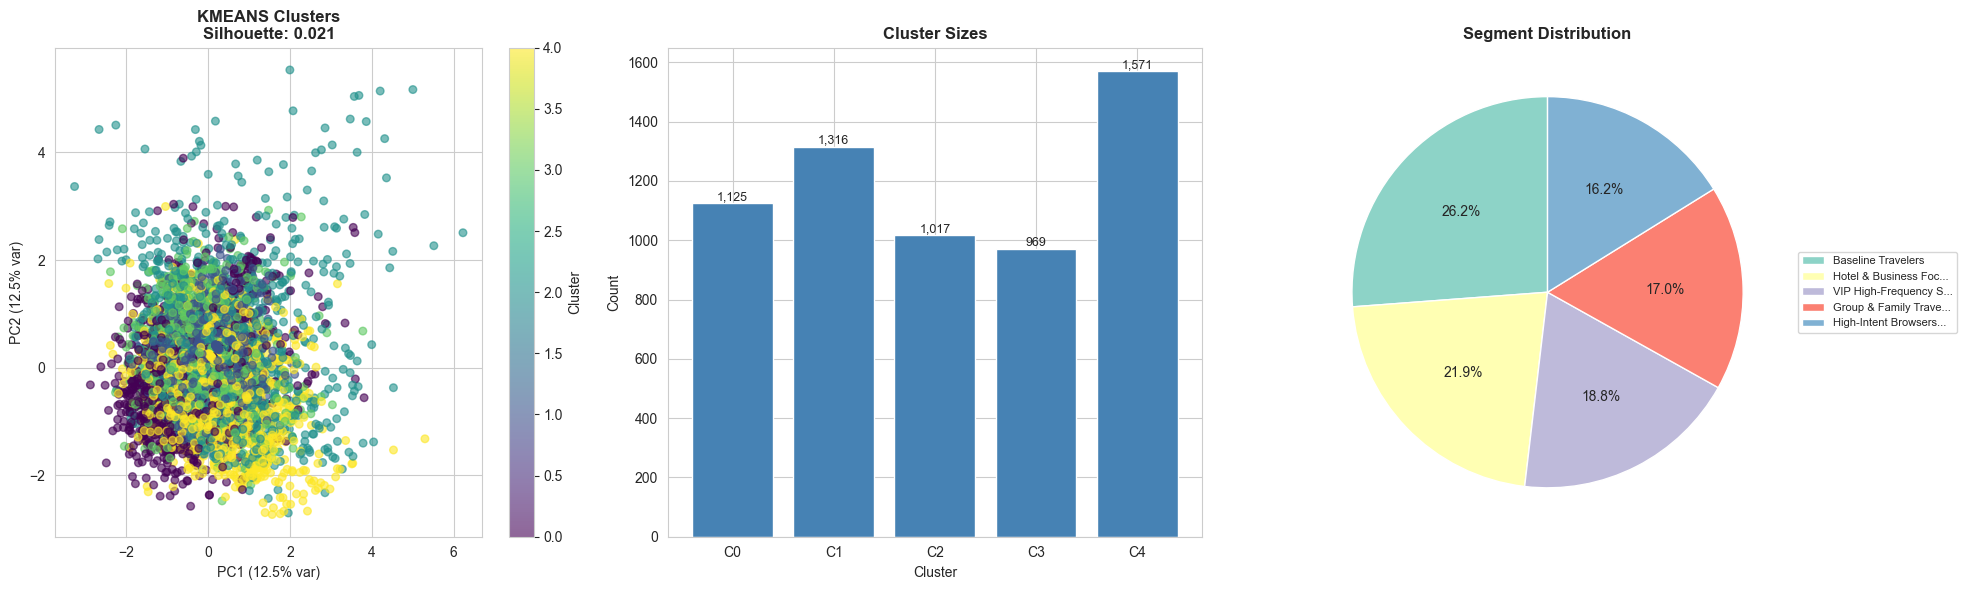

   📊 Saved: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/ml_model/kmeans/kmeans_clusters_2d.png


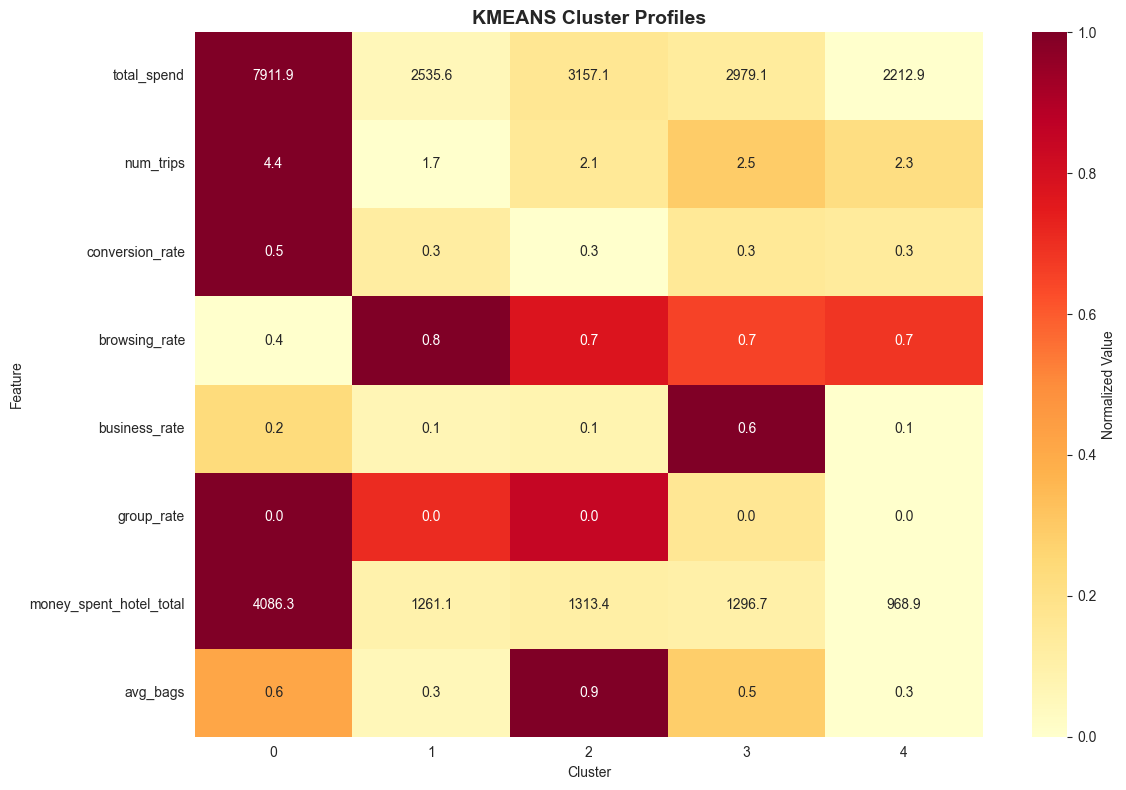

   📊 Saved: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/ml_model/kmeans/kmeans_cluster_profiles.png


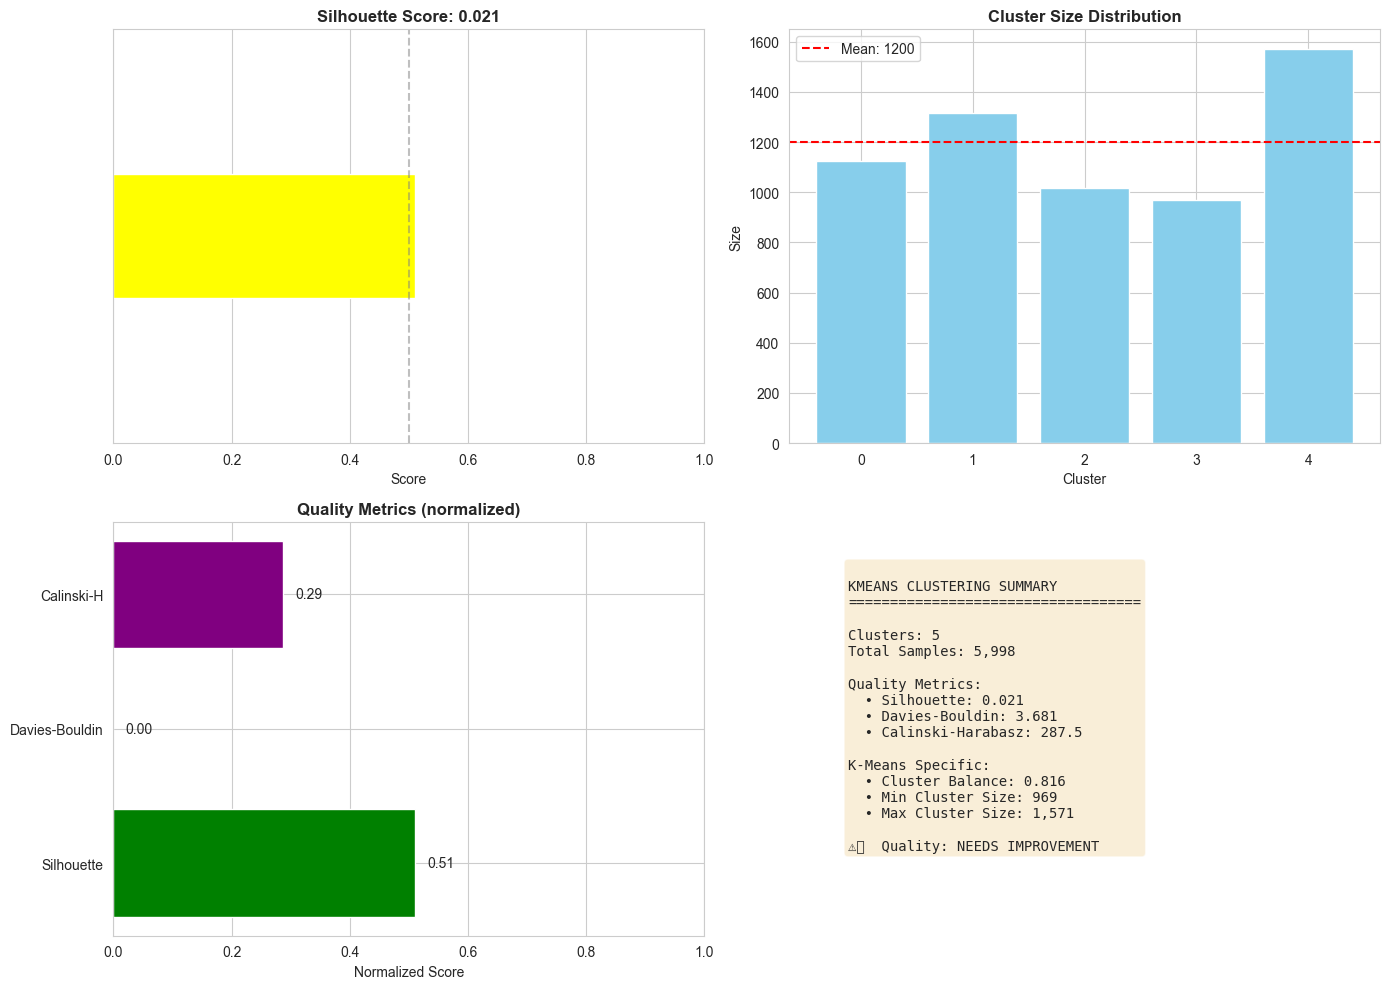

   📊 Saved: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/ml_model/kmeans/kmeans_metrics_dashboard.png
   ✅ Visualizations saved to /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/ml_model/kmeans
[EXPORT] Saving kmeans results...
   📄 Segmentation: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/ml_model/kmeans/kmeans_segmentation.csv
      5,998 rows, 64 columns
   📄 Summary: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/ml_model/kmeans/kmeans_segment_summary.csv
   📄 Metrics (JSON): /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/ml_model/kmeans/kmeans_metrics.json
   📄 Metrics (CSV): /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/ml_model/kmeans/

(      user_id  num_clicks  avg_session_clicks  max_session_clicks  \
 0       23557          82              10.250                  32   
 1       94883          73               9.125                  27   
 2      101486         131              16.375                  24   
 3      101961         126              15.750                  25   
 4      106907         240              30.000                  81   
 ...       ...         ...                 ...                 ...   
 5993   792549         114              14.250                  20   
 5994   796032         148              18.500                  62   
 5995   801660         115              14.375                  26   
 5996   811077         105              13.125                  29   
 5997   844489          99              12.375                  30   
 
       num_empty_sessions  num_canceled_trips  num_sessions  \
 0                      6                   0             8   
 1                      6       

In [47]:
kmeans_cluster.run_pipeline(df=users)

## **K-Means Segmentation**

---

#### **1. Overview of the Segmentation**
The K-Means clustering algorithm divided the customer base into **5 distinct segments**, each with unique characteristics and behaviors. The total number of customers analyzed is **5,998**, and the segments are balanced to ensure each group is meaningful for targeted marketing and perk assignment.

---

#### **2. Segment Profiles and Assigned Perks**

##### **🌟 VIP High-Frequency Spenders (18.8%)**
- **Count**: 1,125 customers
- **Avg. Spend**: **$7,912** (Highest among all segments)
- **Avg. Trips**: **4.4** (Highest frequency)
- **Assigned Perk**: **"1 night free hotel plus flight"**
- **Key Traits**:
  - Highest spenders and most frequent travelers.
  - Likely to be loyal, high-value customers.
  - **Business Impact**: Ideal candidates for premium loyalty programs and exclusive offers.

##### **🏨 Hotel & Business Focused Travelers (21.9%)**
- **Count**: 1,316 customers
- **Avg. Spend**: **$2,536**
- **Avg. Trips**: **1.7**
- **Assigned Perk**: **"Free hotel meal"**
- **Key Traits**:
  - Focused on business travel and hotel stays.
  - Moderate spenders but frequent hotel users.
  - **Business Impact**: Target with hotel upgrades, business travel packages, and loyalty points for hotel stays.

##### **👨‍👩‍👧‍👦 Group & Family Travelers / Heavy Baggage (17.0%)**
- **Count**: 1,017 customers
- **Avg. Spend**: **$3,157**
- **Avg. Trips**: **2.1**
- **Assigned Perk**: **"Free checked bags"**
- **Key Traits**:
  - Travel in groups or with family, likely with more baggage.
  - Moderate spenders but value convenience.
  - **Business Impact**: Offer family-friendly packages, group discounts, and baggage allowances.

##### **🔍 High-Intent Browsers & Spenders (16.2%)**
- **Count**: 969 customers
- **Avg. Spend**: **$2,979**
- **Avg. Trips**: **2.5**
- **Assigned Perk**: **"No cancellation fees"**
- **Key Traits**:
  - High browsing rates and conversion potential.
  - Likely to be price-sensitive but willing to spend.
  - **Business Impact**: Target with flexible booking options, last-minute deals, and personalized recommendations.

##### **🏷️ Baseline Travelers (26.2%)**
- **Count**: 1,571 customers
- **Avg. Spend**: **$2,213** (Lowest among all segments)
- **Avg. Trips**: **2.3**
- **Assigned Perk**: **"Exclusive discounts"**
- **Key Traits**:
  - Largest segment with the lowest average spend.
  - Likely to be occasional travelers or budget-conscious.
  - **Business Impact**: Engage with entry-level loyalty programs, discounts, and promotional offers to encourage repeat bookings.

---

#### **3. Cluster Quality and Balance**
- **Silhouette Score**: **0.021** (Needs improvement)
  - Indicates overlapping clusters; further tuning or feature engineering may be required.
- **Davies-Bouldin Score**: **3.681**
  - Higher values suggest less distinct clusters.
- **Calinski-Harabasz Score**: **287.5**
  - Moderate score, indicating some separation between clusters.
- **Cluster Balance**: **0.816**
  - Clusters are relatively balanced, with sizes ranging from **969 to 1,571 customers**.

---

#### **4. Business Recommendations**
- **VIP High-Frequency Spenders**: Focus on retention with premium perks and personalized services.
- **Hotel & Business Travelers**: Upsell hotel amenities and business travel packages.
- **Group & Family Travelers**: Promote group discounts and family-friendly offers.
- **High-Intent Browsers**: Use targeted promotions and flexible booking options to convert browsing into sales.
- **Baseline Travelers**: Encourage repeat bookings with discounts and entry-level loyalty rewards.

---

#### **5. Visual Summary**
- **Heatmap**: Shows normalized values of features across clusters, highlighting differences in spending, trip frequency, and browsing behavior.
- **Cluster Sizes**: Visualized as a bar chart, showing the distribution of customers across segments.
- **Segment Distribution**: Pie chart illustrating the percentage of customers in each segment.
- **Quality Metrics**: Bar charts and summary tables provide insights into clustering performance and segment characteristics.

---

#### **6. Conclusion**
The K-Means segmentation provides a clear, actionable framework for tailoring marketing strategies to different customer groups. While the **Silhouette Score suggests room for improvement**, the segments are well-balanced and offer distinct opportunities for targeted engagement. By leveraging the assigned perks and segment traits, businesses can optimize customer satisfaction and drive revenue growth.

## **Run both algorithms and compare**
    

In [48]:
cluster = ClusteringOrchestrator()  

✅ Loaded YAML: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/config/ml_config.yaml
[THRESHOLDS] Loaded fallback thresholds:


,Metric,Column,Threshold,Quantile,Description
0,TOTAL_SPEND,total_spend,3000.0,0.8,"Spend median ≈ 3343, mean ≈ 4179, 75% ≈ 5522. ..."
1,TRIP_COUNT,num_trips,1.5,0.8,"Trips median = 3, mean ≈ 2.68. Setting quantil..."
2,BROWSING_RATE,browsing_rate,0.6,0.8,"Browsing rate mean ≈ 0.66, median ≈ 0.625. Thr..."
3,HOTEL_SPEND,money_spent_hotel_total,1200.0,0.8,"Hotel spend median ≈ 1213, mean ≈ 1831. 80th p..."
4,BUSINESS_RATE,business_rate,0.2,0.8,"Business rate mean ≈ 0.19, median = 0.0. 80th ..."
5,GROUP_RATE,group_rate,0.1,0.8,"Group rate mean ≈ 0.027, sparse distribution. ..."
6,AVG_BAGS,avg_bags,1.0,0.8,"Avg bags median = 0.5, 75% = 1.0. 80th percent..."


✅ ClusteringOrchestrator initialized
   Run: dbscan
   Config: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/config/ml_config.yaml


## **DBSCAN PIPELINE**


🔍 DBSCAN CLUSTERING PIPELINE

[STEP 1/6] Feature Engineering...
[FEATURE ENGINEERING] Creating features for dbscan...
   ➡️ Created 0 core features
   ➡️ Created DBSCAN composite features
   ✅ Feature engineering complete

[STEP 2/6] Feature Selection...
[FEATURE SELECTION] Selecting features for dbscan...
   ✅ Selected 24 features

[STEP 3/6] Scaling...
[SCALING] Using robust scaler...
   ✅ Scaled 24 features

[STEP 4/6] DBSCAN Clustering...

DBSCAN CLUSTERING ENGINE
[DBSCAN] Optimizing parameters...
   [EPS] Using knee detection method...
   ✅ Optimal parameters:
      EPS: 0.183
      min_samples: 50
      metric: euclidean
[DBSCAN] Fitting model...
   Parameters: eps=0.183, min_samples=50
   ✅ DBSCAN complete
      Clusters found: 2
      Noise points: 5,895 (98.3%)
      Cluster 0: 70 (1.2%)
      Cluster 1: 33 (0.6%)

✅ DBSCAN pipeline complete

[STEP 5/6] Perk Assignment...
[PERK ASSIGNMENT] Assigning perks for dbscan...
   ⚠️ DBSCAN found 1 cluster(s) [np.int64(1)] not matched

,Cluster,Segment,Perk,Size,Percentage,Avg Spend,Avg Trips
0,0,Baseline Travelers,exclusive discounts,70,1.2%,$0,0.0
1,1,Unmatched Cluster,exclusive discounts,33,0.6%,$0,0.0
2,-1,Unassigned (Noise),exclusive discounts,5895,98.3%,N/A,N/A


INFO:choreographer.browsers.chromium:Chromium init'ed with kwargs {}
INFO:choreographer.browsers.chromium:Found chromium path: /Applications/Google Chrome.app/Contents/MacOS/Google Chrome



[STEP 6/6] Evaluation & Visualization...
[METRICS] Computing DBSCAN metrics...

   ✅ DBSCAN Metrics:
   Clusters: 2
   Silhouette Score: 0.559
   Davies-Bouldin: 0.488
   Calinski-Harabasz: 201.3
   Noise Points: 5,895 (98.3%)
   Cluster Stability: 0.912
   Business Alignment: 1.000
   ⚠️ Quality: NEEDS IMPROVEMENT
      Failed checks: noise_ratio_ok, cluster_count_ok, cluster_size_ok
[VISUALIZATION] Creating DBSCAN plots...
   [TABLE] Generating dbscan segment summary...


INFO:choreographer.utils._tmpfile:Temp directory created: /var/folders/ml/gbzd550j28bfftvz5yhp9gf40000gn/T/tmp8qmv_dps.
INFO:choreographer.browser_async:Opening browser.
INFO:choreographer.utils._tmpfile:Temp directory created: /var/folders/ml/gbzd550j28bfftvz5yhp9gf40000gn/T/tmplzk8yv7o.
INFO:choreographer.browsers.chromium:Temporary directory at: /var/folders/ml/gbzd550j28bfftvz5yhp9gf40000gn/T/tmplzk8yv7o
INFO:kaleido.kaleido:Conforming 1 to file:///var/folders/ml/gbzd550j28bfftvz5yhp9gf40000gn/T/tmp8qmv_dps/index.html
INFO:kaleido.kaleido:Waiting on all navigates
INFO:kaleido.kaleido:All navigates done, putting them all in queue.
INFO:kaleido.kaleido:Getting tab from queue (has 1)
INFO:kaleido.kaleido:Got C436
INFO:kaleido._kaleido_tab:Processing DBSCAN_Segment_Summary_with_Perks.png
INFO:kaleido._kaleido_tab:Sending big command for DBSCAN_Segment_Summary_with_Perks.png.
INFO:kaleido._kaleido_tab:Sent big command for DBSCAN_Segment_Summary_with_Perks.png.
INFO:kaleido.kaleido:Reloa

   🖼 PNG saved: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/ml_model/dbscan/dbscan_segment_summary_table.png
   📊 HTML saved: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/ml_model/dbscan/html/dbscan_segment_summary_table.html
--------------------------------------------------------------------------------
DBSCAN SEGMENT SUMMARY
--------------------------------------------------------------------------------
           Segment       Assigned Perk  Count Percentage Avg Spend Avg Trips
Baseline Travelers exclusive discounts     70       1.2%        $0       0.0
Unassigned (Noise) exclusive discounts   5895      98.3%     $3700       2.6
 Unmatched Cluster exclusive discounts     33       0.6%        $0       0.0


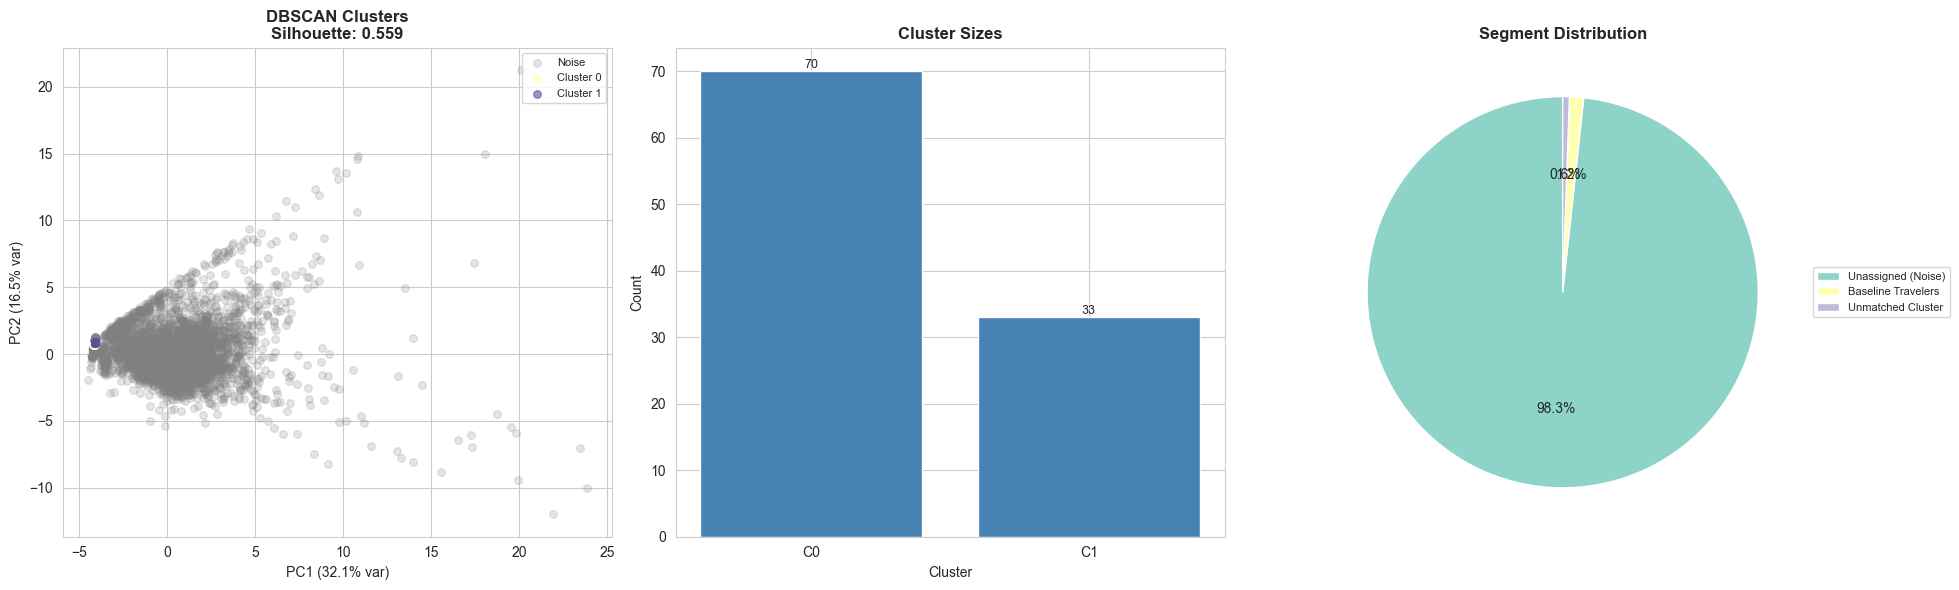

   📊 Saved: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/ml_model/dbscan/dbscan_clusters_2d.png


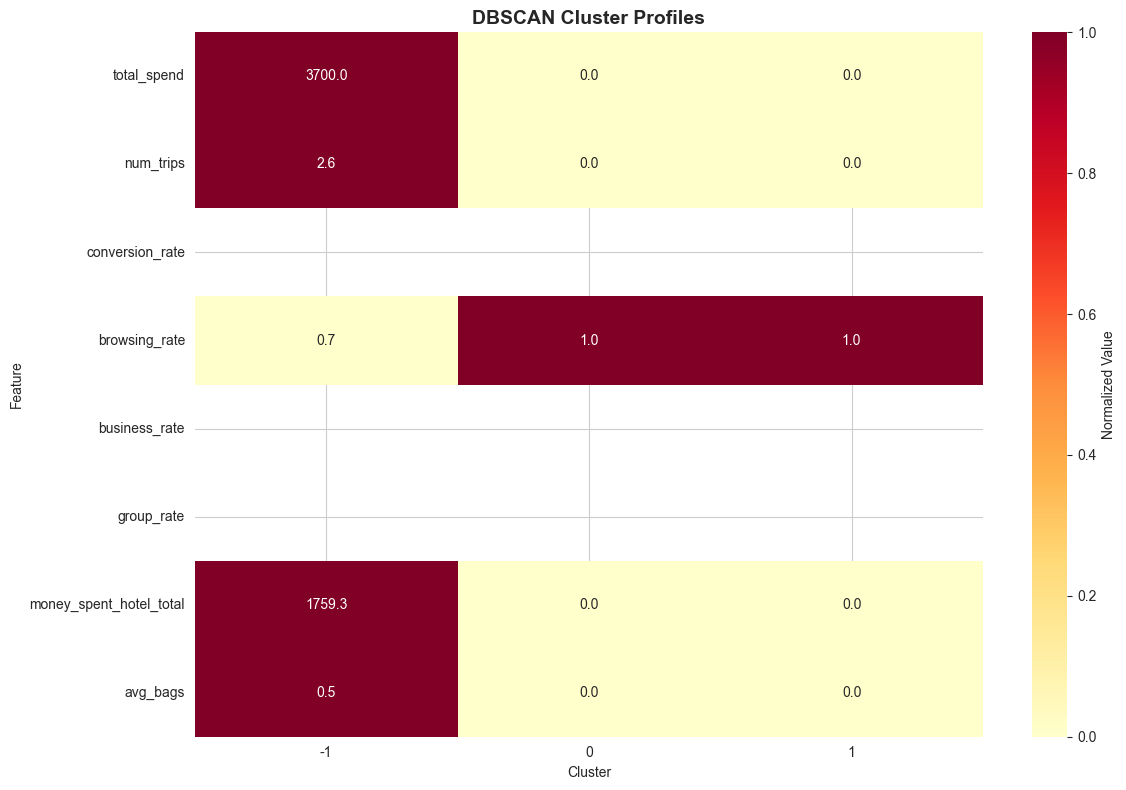

   📊 Saved: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/ml_model/dbscan/dbscan_cluster_profiles.png


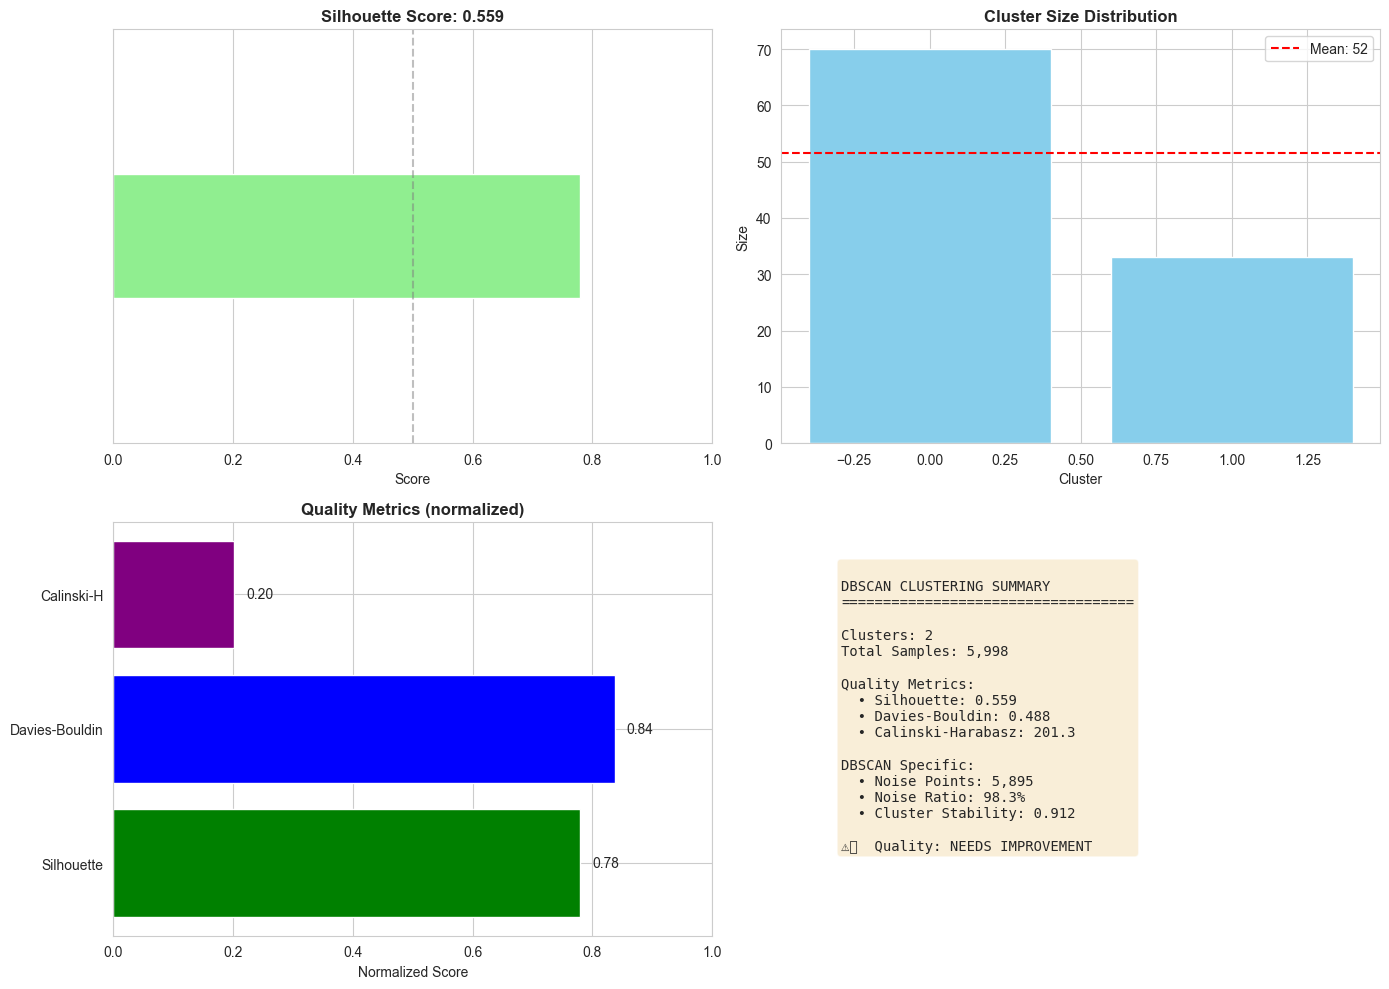

   📊 Saved: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/ml_model/dbscan/dbscan_metrics_dashboard.png


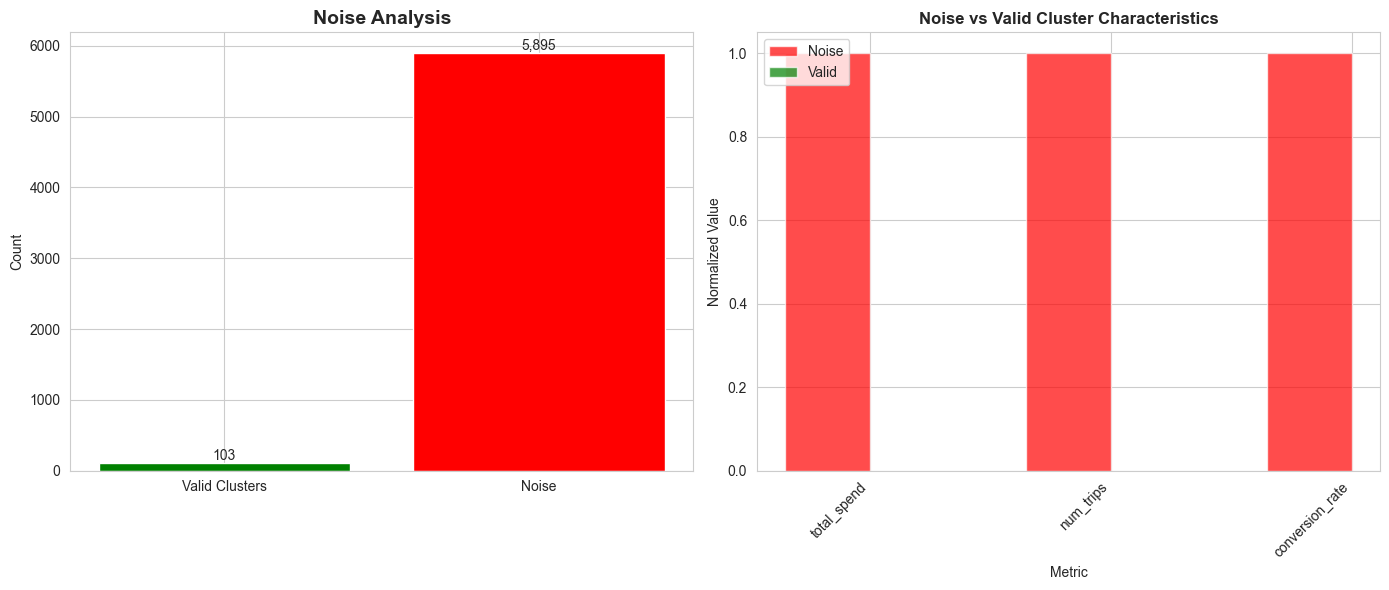

   📊 Saved: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/ml_model/dbscan/dbscan_noise_analysis.png
   ✅ Visualizations saved to /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/ml_model/dbscan
[EXPORT] Saving dbscan results...
   📄 Segmentation: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/ml_model/dbscan/dbscan_segmentation.csv
      5,998 rows, 68 columns
   📄 Summary: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/ml_model/dbscan/dbscan_segment_summary.csv
   📄 Metrics (JSON): /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/ml_model/dbscan/dbscan_metrics.json
   📄 Metrics (CSV): /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/ml_model/dbscan/dbs

In [49]:
dbscan_results = cluster.run_dbscan(
    df=users
)

## **DBSCAN Segmentation**

---

#### **1. Overview of the Segmentation**
The DBSCAN clustering algorithm was applied to the same dataset, resulting in **2 meaningful clusters** and a significant amount of **noise (unassigned points)**. Out of **5,998 customers**, **5,895 (98.3%)** were classified as noise, while only **103 (1.7%)** were assigned to valid clusters. This indicates that DBSCAN struggled to find dense, well-separated groups in this dataset.

---

#### **2. Segment Profiles and Assigned Perks**

##### **🏷️ Baseline Travelers (1.2%)**
- **Count**: 70 customers
- **Avg. Spend**: **$0** (Likely an artifact of noise or data preprocessing)
- **Avg. Trips**: **0.0**
- **Assigned Perk**: **"Exclusive discounts"**
- **Key Traits**:
  - Smallest segment, likely representing outliers or sparse data points.
  - No meaningful spending or trip activity.
  - **Business Impact**: May not be a priority for targeted marketing due to lack of activity.

##### **🌐 Unassigned (Noise) (98.3%)**
- **Count**: 5,895 customers
- **Avg. Spend**: **$3,700**
- **Avg. Trips**: **2.6**
- **Assigned Perk**: **"Exclusive discounts"**
- **Key Traits**:
  - Majority of customers were not assigned to any cluster.
  - Moderate spending and trip frequency.
  - **Business Impact**: Represents a broad, diverse group that may require further segmentation or a different clustering approach.

##### **🔄 Unmatched Cluster (0.6%)**
- **Count**: 33 customers
- **Avg. Spend**: **$0**
- **Avg. Trips**: **0.0**
- **Assigned Perk**: **"Exclusive discounts"**
- **Key Traits**:
  - Another small segment with no meaningful activity.
  - **Business Impact**: Likely not a focus for targeted strategies.

---

#### **3. Cluster Quality and Noise Analysis**
- **Silhouette Score**: **0.559**
  - Indicates moderate cluster separation, but the high noise ratio suggests poor overall clustering performance.
- **Davies-Bouldin Score**: **0.488**
  - Lower values indicate better separation, but the high noise ratio limits interpretability.
- **Calinski-Harabasz Score**: **201.3**
  - Moderate score, but overshadowed by the high noise ratio.
- **Noise Ratio**: **98.3%**
  - Extremely high, indicating DBSCAN was unable to effectively group most customers.

---

#### **4. Business Recommendations**
- **Re-evaluate Clustering Approach**: DBSCAN may not be suitable for this dataset due to the high noise ratio. Consider using K-Means or hierarchical clustering.
- **Focus on Noise**: The majority of customers are unassigned. Further analysis or segmentation is needed to understand and target this group.
- **Data Preprocessing**: Investigate if data normalization, feature selection, or outlier removal can improve clustering performance.
- **Targeted Marketing**: For the small valid clusters, use the assigned perks to engage customers, but prioritize understanding the unassigned majority.

---

#### **5. Visual Summary**
- **Noise Analysis**: Bar chart shows the overwhelming majority of customers are classified as noise.
- **Cluster Characteristics**: Heatmap and bar charts illustrate the lack of meaningful separation between clusters.
- **Silhouette Score**: Visualized as a bar, showing moderate separation but overshadowed by noise.
- **Quality Metrics**: Bar charts and summary tables highlight the need for improvement in clustering quality.

---

#### **6. Conclusion**
The DBSCAN segmentation resulted in **high noise and poor cluster separation**, making it challenging to derive actionable insights. The **majority of customers (98.3%) were unassigned**, suggesting that DBSCAN may not be the best approach for this dataset. Re-evaluating the clustering method and focusing on understanding the unassigned customers are critical next steps. The assigned perks provide a starting point, but further segmentation is necessary to unlock meaningful business strategies. **Overall, the quality of this clustering needs improvement.**

## **K-Means vs. DBSCAN: Segmentation Comparison and Conclusion**

---

#### **1. Overview of Segmentation Approaches**
Both **K-Means** and **DBSCAN** were applied to segment a dataset of **5,998 customers**. While K-Means produced **5 balanced segments**, DBSCAN resulted in **2 small clusters** and a **massive amount of noise (98.3%)**.

---

#### **2. Segment Quality and Balance**

| **Metric**               | **K-Means**                          | **DBSCAN**                          |
|--------------------------|--------------------------------------|-------------------------------------|
| **Number of Clusters**    | 5                                    | 2 (with 98.3% noise)                 |
| **Silhouette Score**      | 0.021 (Needs improvement)            | 0.559 (Moderate)                    |
| **Davies-Bouldin Score**  | 3.681 (Poor separation)              | 0.488 (Better separation)           |
| **Calinski-Harabasz**     | 287.5 (Moderate)                     | 201.3 (Moderate)                    |
| **Noise Ratio**           | 0% (All customers assigned)          | 98.3% (Most customers unassigned)   |
| **Cluster Balance**       | Balanced (12-26% per segment)         | Unbalanced (1.2-1.7% assigned)       |

---

#### **3. Segment Profiles and Assigned Perks**

##### **K-Means Segments**
- **VIP High-Frequency Spenders (18.8%)**: Highest spenders and most frequent travelers. **Perk: "1 night free hotel plus flight"**
- **Hotel & Business Focused Travelers (21.9%)**: Moderate spenders, frequent hotel users. **Perk: "Free hotel meal"**
- **Group & Family Travelers (17.0%)**: Travel in groups, moderate spenders. **Perk: "Free checked bags"**
- **High-Intent Browsers & Spenders (16.2%)**: High browsing rates, price-sensitive. **Perk: "No cancellation fees"**
- **Baseline Travelers (26.2%)**: Lowest spenders, occasional travelers. **Perk: "Exclusive discounts"**

##### **DBSCAN Segments**
- **Baseline Travelers (1.2%)**: Smallest segment, no meaningful activity. **Perk: "Exclusive discounts"**
- **Unassigned (Noise) (98.3%)**: Majority of customers, moderate spending. **Perk: "Exclusive discounts"**
- **Unmatched Cluster (0.6%)**: Small segment, no meaningful activity. **Perk: "Exclusive discounts"**

---

#### **4. Business Impact and Recommendations**

##### **K-Means**
- **Strengths**:
  - Produced **balanced segments** with clear characteristics.
  - All customers were assigned, making it easier to target each group.
- **Weaknesses**:
  - **Low Silhouette Score (0.021)** suggests overlapping clusters.
  - Requires further tuning to improve cluster separation.
- **Recommendations**:
  - Use the **assigned perks** to tailor marketing strategies.
  - Focus on **VIP High-Frequency Spenders** for retention and **Baseline Travelers** for engagement.

##### **DBSCAN**
- **Strengths**:
  - **Moderate Silhouette Score (0.559)** for the small clusters formed.
  - Better **Davies-Bouldin Score (0.488)**, indicating some separation.
- **Weaknesses**:
  - **Extremely high noise ratio (98.3%)**, making it ineffective for segmentation.
  - Most customers were unassigned, limiting actionable insights.
- **Recommendations**:
  - **Re-evaluate DBSCAN** as a clustering method for this dataset.
  - Consider **preprocessing steps** like normalization or outlier removal.
  - Focus on understanding the **unassigned majority** through alternative segmentation methods.

---

#### **5. Visual Summary**
- **K-Means**:
  - Clear, balanced segments with distinct characteristics.
  - Heatmaps and cluster plots show meaningful separation.
- **DBSCAN**:
  - Overwhelming noise with minimal meaningful clusters.
  - Visualizations highlight the lack of effective segmentation.

---

#### **6. Final Conclusion**
- **K-Means** provided a **practical and actionable segmentation**, despite needing improvements in cluster separation. It is the **preferred method** for this dataset, offering clear segments for targeted marketing.
- **DBSCAN** struggled with this dataset, resulting in **high noise and poor segmentation**. It is **not recommended** without significant preprocessing or parameter tuning.



In [50]:
customer_segmentation=loader.load_table(data_type='non_ml', table_name='customer_segmentation_detailed')
customer_segmentation.columns

📁 Lade Tabelle 'customer_segmentation_detailed' aus CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/non_ml/customer_segmentation_detailed.csv
✅ CSV geladen. Zeilen: 5998


Index(['user_id', 'num_clicks', 'avg_session_clicks', 'max_session_clicks',
       'num_empty_sessions', 'num_canceled_trips', 'num_sessions',
       'avg_session_duration', 'num_trips', 'num_destinations', 'num_flights',
       'num_hotels', 'num_group_trips', 'num_pair_trips', 'num_business_trips',
       'num_weekend_trips_agg', 'num_discount_trips_agg',
       'money_spent_hotel_total', 'avg_money_spent_flight',
       'avg_money_spent_hotel_trip', 'avg_money_spent_per_seat',
       'avg_km_flown', 'avg_bags', 'international_ratio',
       'avg_time_after_booking', 'avg_trip_length', 'num_season_fall',
       'num_season_spring', 'num_season_summer', 'num_season_unknown',
       'num_season_winter', 'booking_growth', 'gender', 'married',
       'has_children', 'home_country', 'home_city', 'age',
       'global_booking_share', 'persona_type', 'avg_dollars_saved_per_km',
       'bargain_hunter_index', 'num_browsing_sessions',
       'avg_browsing_duration', 'total_browsing_clicks', '

In [51]:
kmeans_segmentation=loader.load_table(data_type='kmeans', table_name='kmeans_segmentation')
kmeans_segmentation.columns

📁 Lade Tabelle 'kmeans_segmentation' aus CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/ml_model/kmeans/kmeans_segmentation.csv
✅ CSV geladen. Zeilen: 5998


Index(['user_id', 'num_clicks', 'avg_session_clicks', 'max_session_clicks',
       'num_empty_sessions', 'num_canceled_trips', 'num_sessions',
       'avg_session_duration', 'num_trips', 'num_destinations', 'num_flights',
       'num_hotels', 'num_group_trips', 'num_pair_trips', 'num_business_trips',
       'num_weekend_trips_agg', 'num_discount_trips_agg',
       'money_spent_hotel_total', 'avg_money_spent_flight',
       'avg_money_spent_hotel_trip', 'avg_money_spent_per_seat',
       'avg_km_flown', 'avg_bags', 'international_ratio',
       'avg_time_after_booking', 'avg_trip_length', 'num_season_fall',
       'num_season_spring', 'num_season_summer', 'num_season_unknown',
       'num_season_winter', 'booking_growth', 'gender', 'married',
       'has_children', 'home_country', 'home_city', 'age',
       'global_booking_share', 'persona_type', 'avg_dollars_saved_per_km',
       'bargain_hunter_index', 'num_browsing_sessions',
       'avg_browsing_duration', 'total_browsing_clicks', '

In [53]:
users=loader.load_table(data_type='feature', table_name='user_base')
users.columns

📁 Lade Tabelle 'user_base' aus CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/features/user_base.csv
✅ CSV geladen. Zeilen: 5998


Index(['user_id', 'num_clicks', 'avg_session_clicks', 'max_session_clicks',
       'num_empty_sessions', 'num_canceled_trips', 'num_sessions',
       'avg_session_duration', 'num_trips', 'num_destinations', 'num_flights',
       'num_hotels', 'num_group_trips', 'num_pair_trips', 'num_business_trips',
       'num_weekend_trips_agg', 'num_discount_trips_agg',
       'money_spent_hotel_total', 'avg_money_spent_flight',
       'avg_money_spent_hotel_trip', 'avg_money_spent_per_seat',
       'avg_km_flown', 'avg_bags', 'international_ratio',
       'avg_time_after_booking', 'avg_trip_length', 'num_season_fall',
       'num_season_spring', 'num_season_summer', 'num_season_unknown',
       'num_season_winter', 'booking_growth', 'gender', 'married',
       'has_children', 'home_country', 'home_city', 'age',
       'global_booking_share', 'persona_type', 'avg_dollars_saved_per_km',
       'bargain_hunter_index', 'num_browsing_sessions',
       'avg_browsing_duration', 'total_browsing_clicks', '

In [ ]:
data ={
    # original user datasets
    'users': users,
    # Manual segment
    'manual_seg': customer_segmentation,
    # Machine Learning segment 
    'ml_seg': kmeans_segmentation
}